# ***☀️ SunCast: Predicting Solar Power Generation Using ML Models***

## INTRODUCTION
Solar energy has become a cornerstone of sustainable development, offering a clean, renewable, and efficient alternative to conventional energy sources. However, solar power generation depends heavily on environmental factors such as temperature, irradiance, and weather conditions, making accurate prediction a complex challenge. Leveraging machine learning (ML) techniques can enhance the ability to forecast solar energy generation, thereby improving grid stability, energy management, and planning.

## PROBLEM STATEMENT 
Accurate prediction of solar energy generation is a critical challenge.

* Solar output depends on highly dynamic and nonlinear factors.

* Traditional statistical models struggle to capture these complexities.

* Machine Learning offers advanced techniques for better forecasting.

* This study evaluates Linear Regression, Ridge Regression, Random Forest, Gradient Boosting Regressor (GBR) and XGBoost Regressor.

The goal is to identify the most reliable model for accurate solar energy prediction and improved renewable energy management.

#### STEP 1: Importing Libraries and exploring datasets

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


Imported all the essential Python libraries 
and modules that will help us with data analysis, preprocessing, 
model training, and evaluation.

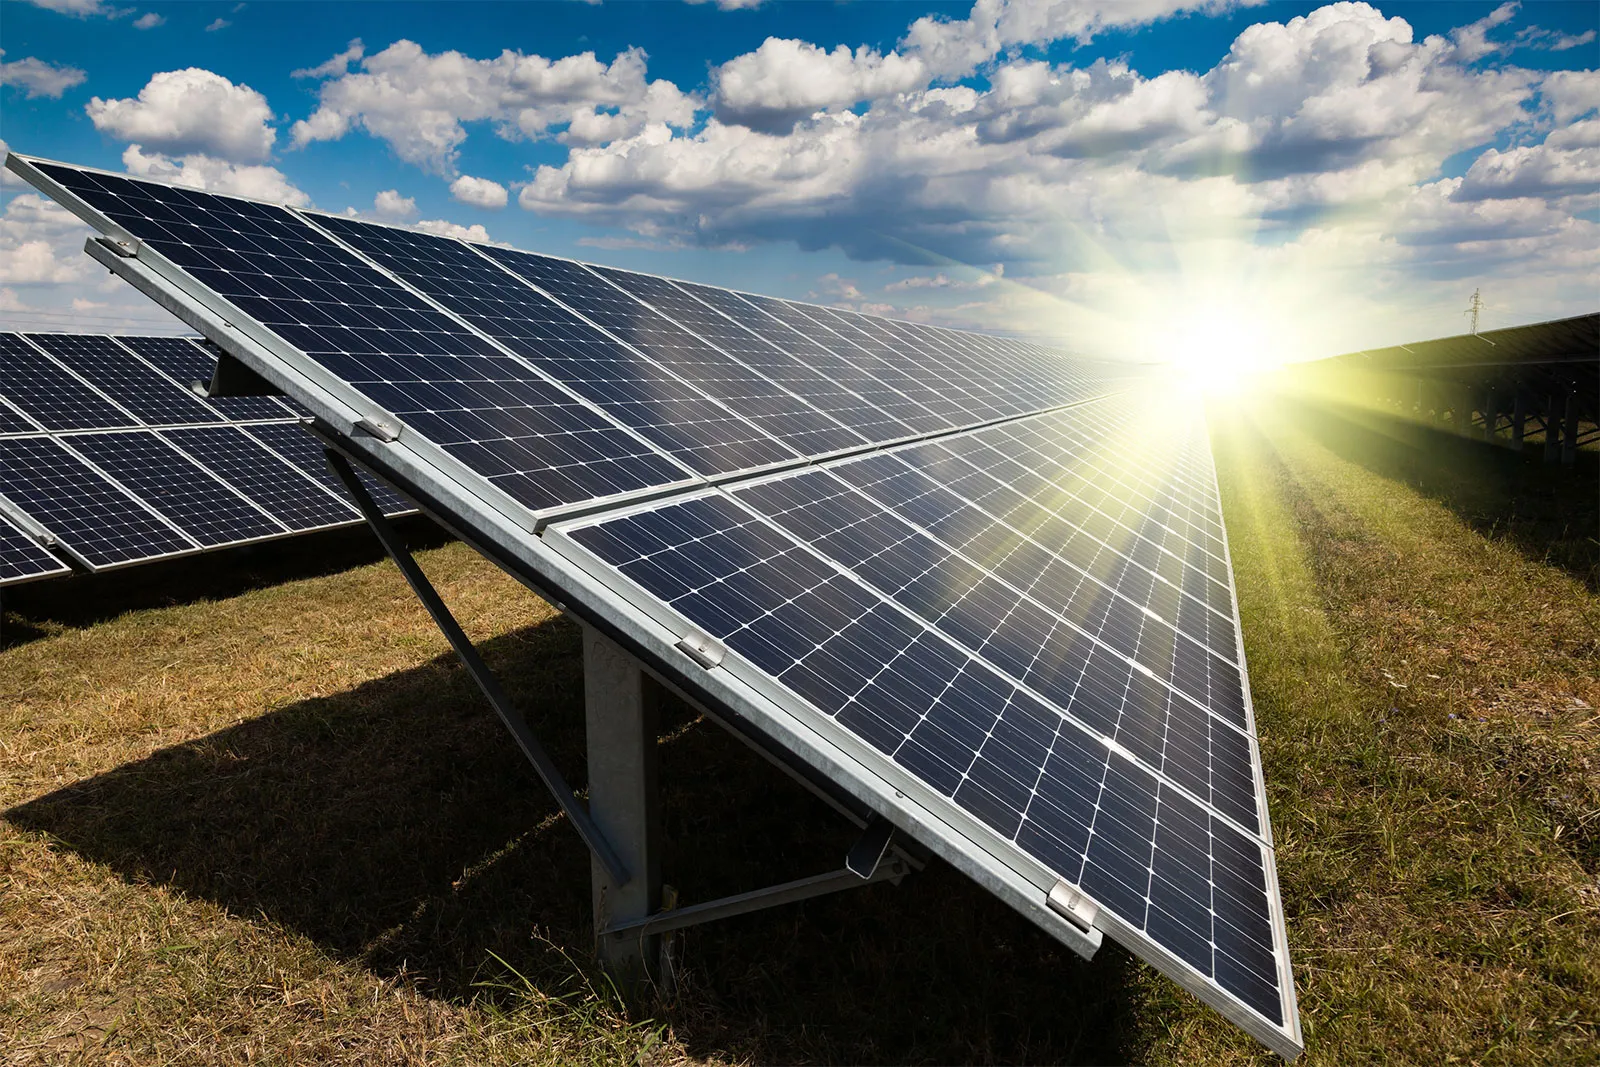

In [2]:
Image("1.webp")

In [3]:
df = pd.read_csv("spg.csv")

Loaded the datasets into a pandas DataFrame.

In [4]:
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


Displays the whole dataset of the DataFrame.

#### Dataset Column Explanations

- **temperature_2_m_above_gnd**: Air temperature measured at 2 meters above the ground (°C).  
- **relative_humidity_2_m_above_gnd**: Percentage of water vapor present in the air at 2 meters above ground relative to the maximum it could hold (%).  
- **mean_sea_level_pressure_MSL**: Atmospheric pressure reduced to mean sea level (hPa).  
- **total_precipitation_sfc**: Accumulated precipitation (rain + melted snow) at the surface (mm).  
- **snowfall_amount_sfc**: Amount of snowfall recorded at the surface (mm).  
- **total_cloud_cover_sfc**: Fraction of sky covered by clouds at the surface (%).  
- **high_cloud_cover_high_cld_lay**: Cloud cover contribution from high-level clouds (%).  
- **medium_cloud_cover_mid_cld_lay**: Cloud cover contribution from mid-level clouds (%).  
- **low_cloud_cover_low_cld_lay**: Cloud cover contribution from low-level clouds (%).  
- **shortwave_radiation_backwards_sfc**: Incoming shortwave solar radiation received at the surface (W/m²).  
- **wind_speed_10_m_above_gnd**: Wind speed measured at 10 meters above the ground (m/s).  
- **wind_direction_10_m_above_gnd**: Wind direction (degrees from north) measured at 10 meters above the ground.  
- **wind_speed_80_m_above_gnd**: Wind speed measured at 80 meters above the ground (m/s).  
- **wind_direction_80_m_above_gnd**: Wind direction (degrees from north) measured at 80 meters above the ground.  
- **wind_speed_900_mb**: Wind speed at the 900 mb pressure level (approximately 1 km above sea level) (m/s).  
- **wind_direction_900_mb**: Wind direction at the 900 mb pressure level (degrees from north).  
- **wind_gust_10_m_above_gnd**: Maximum wind gusts observed at 10 meters above the ground (m/s).  
- **angle_of_incidence**: Angle between the incoming solar radiation and a perpendicular to the surface (degrees).  
- **zenith**: Solar zenith angle – angle between the sun and the vertical direction (degrees).  
- **azimuth**: Solar azimuth angle – compass direction of the sun (degrees).  
- **generated_power_kw**: Power output generated by the system (kW).  


In [5]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


Displays the first 5 rows of the DataFrame by default.

In [6]:
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


Diplays the last 5 rows of the DataFrame by default.

#### STEP 2: Exploratory Data Analysis (EDA)

In [7]:
df.shape

(4213, 21)

Returns a tuple (rows, columns) of the DataFrame.

In [8]:
df.size

88473

Returns the total number of elements in the DataFrame (rows × columns).

In [9]:
df.columns.tolist()

['temperature_2_m_above_gnd',
 'relative_humidity_2_m_above_gnd',
 'mean_sea_level_pressure_MSL',
 'total_precipitation_sfc',
 'snowfall_amount_sfc',
 'total_cloud_cover_sfc',
 'high_cloud_cover_high_cld_lay',
 'medium_cloud_cover_mid_cld_lay',
 'low_cloud_cover_low_cld_lay',
 'shortwave_radiation_backwards_sfc',
 'wind_speed_10_m_above_gnd',
 'wind_direction_10_m_above_gnd',
 'wind_speed_80_m_above_gnd',
 'wind_direction_80_m_above_gnd',
 'wind_speed_900_mb',
 'wind_direction_900_mb',
 'wind_gust_10_m_above_gnd',
 'angle_of_incidence',
 'zenith',
 'azimuth',
 'generated_power_kw']

Returns all column names as a Python list.

In [10]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

Displays the data type of each column in the DataFrame.

In [11]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

Returns the number of missing (NaN) values in each column of the DataFrame.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

 Provides a concise summary of the DataFrame.

In [13]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


Generates descriptive statistics for numerical columns in the DataFrame (by default).
* count   → Number of non-null values in each column
* mean    → Average value
* std     → Standard deviation (spread of the data)
* min     → Minimum value
* 25%     → First quartile (Q1) → 25% of data lies below this value
* 50%     → Median (Q2) → Middle value
* 75%     → Third quartile (Q3) → 75% of data lies below this value
* max     → Maximum value

#### STEP 3: Data Visualization 

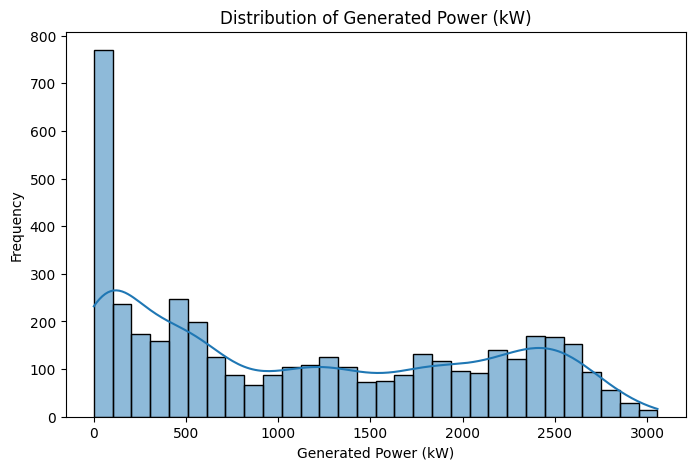

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["generated_power_kw"], bins=30, kde=True)
plt.title("Distribution of Generated Power (kW)")
plt.xlabel("Generated Power (kW)")
plt.ylabel("Frequency")
plt.show()

This histogram shows how the generated power values are distributed. 
It helps check for skewness and common operating power ranges. The KDE curve 
smoothly estimates the probability distribution.  
This graph shows that solar power generation is mostly clustered near 0 kW (night/cloudy periods), with fewer occurrences at higher outputs. The distribution is right-skewed, meaning low power values dominate while peak generation (~3000 kW) is rare. It highlights the intermittent nature of solar energy production.

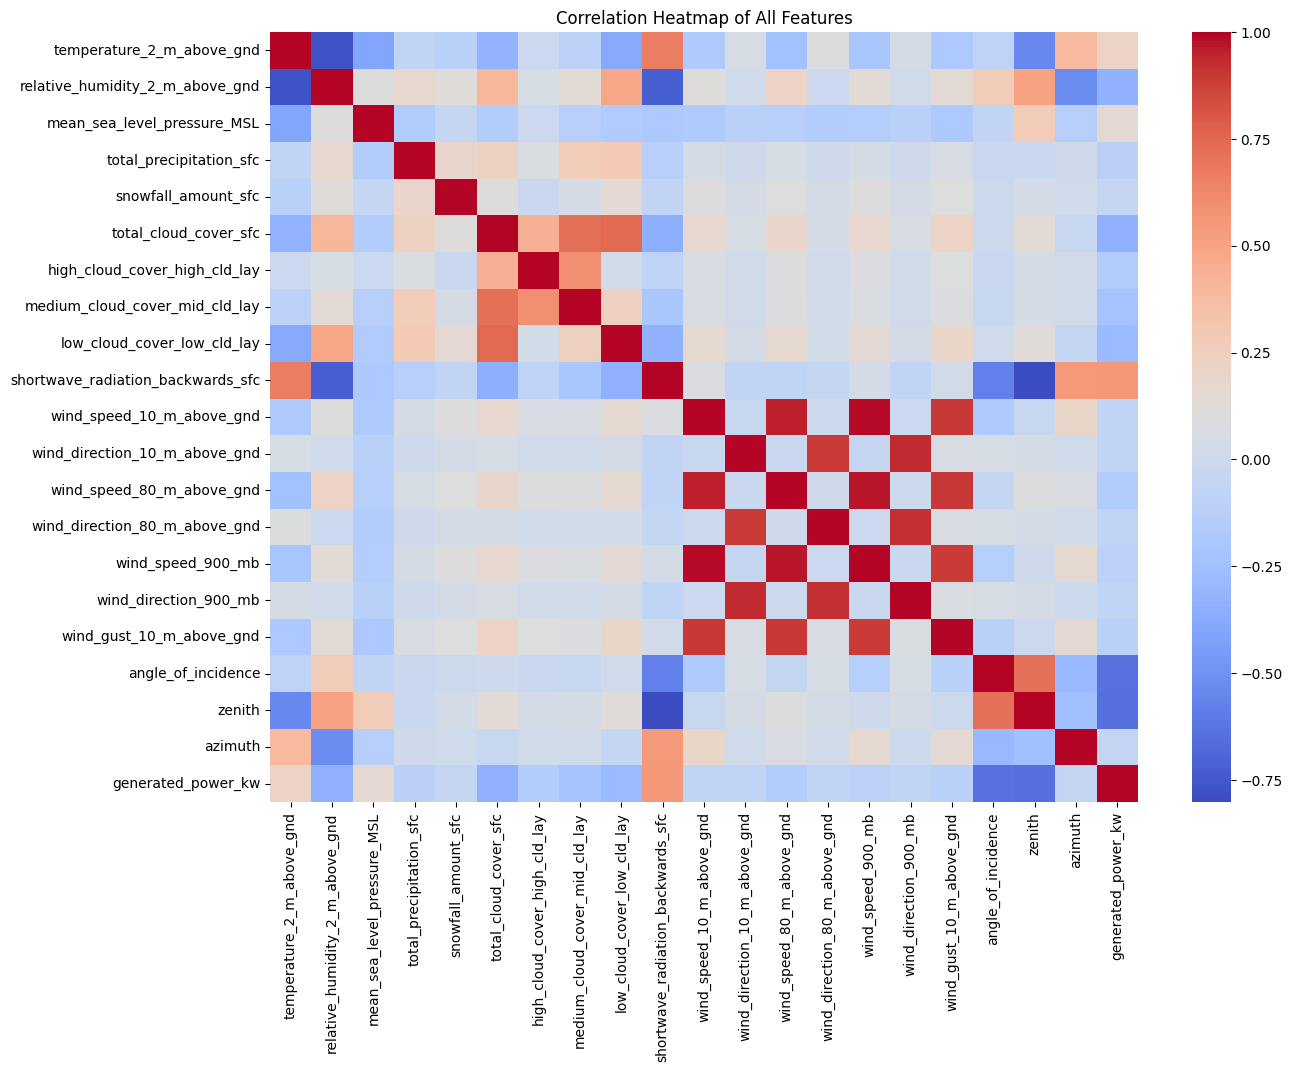

In [15]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap of All Features")
plt.show()

The heatmap highlights correlations between variables. 
Strong positive/negative relationships (close to +1 or -1) indicate 
which features may influence solar power output.  
Strong positive correlation is seen between shortwave radiation and generated power, while cloud cover shows negative correlation. This confirms sunlight availability is the key driver of solar output.

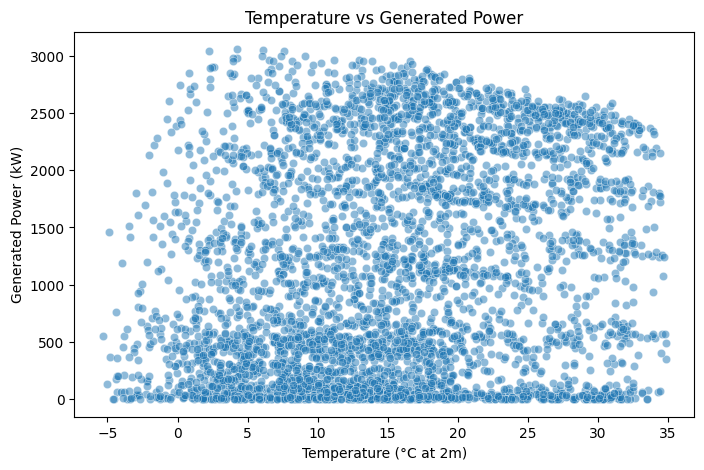

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="temperature_2_m_above_gnd", y="generated_power_kw", data=df, alpha=0.5)
plt.title("Temperature vs Generated Power")
plt.xlabel("Temperature (°C at 2m)")
plt.ylabel("Generated Power (kW)")
plt.show()

This scatter plot shows how temperature impacts power generation. 
We can observe if higher/lower temperatures correlate with increased solar output.  
Power generation increases with temperature up to a point, but very high temperatures may reduce efficiency. The relationship is non-linear, showing an optimal temperature band for production.

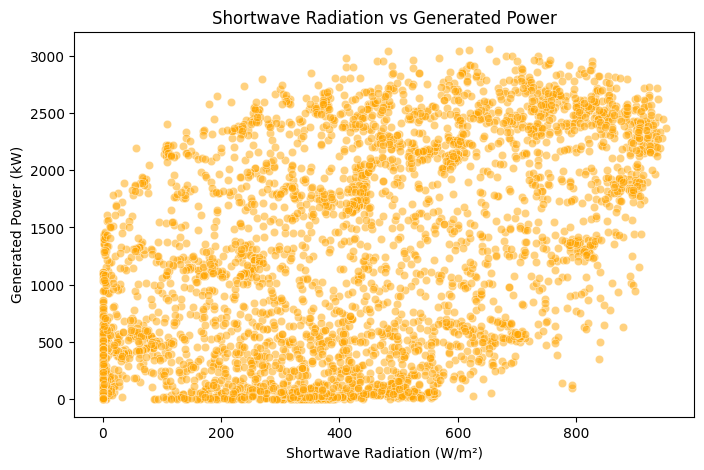

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="shortwave_radiation_backwards_sfc", y="generated_power_kw", data=df, alpha=0.5, color="orange")
plt.title("Shortwave Radiation vs Generated Power")
plt.xlabel("Shortwave Radiation (W/m²)")
plt.ylabel("Generated Power (kW)")
plt.show()

Since solar panels depend on sunlight, shortwave radiation should 
have a strong positive correlation with generated power. This plot verifies that trend.  
A clear positive relationship exists — higher radiation leads to higher power output. This matches physical expectations since panels depend on incoming sunlight.

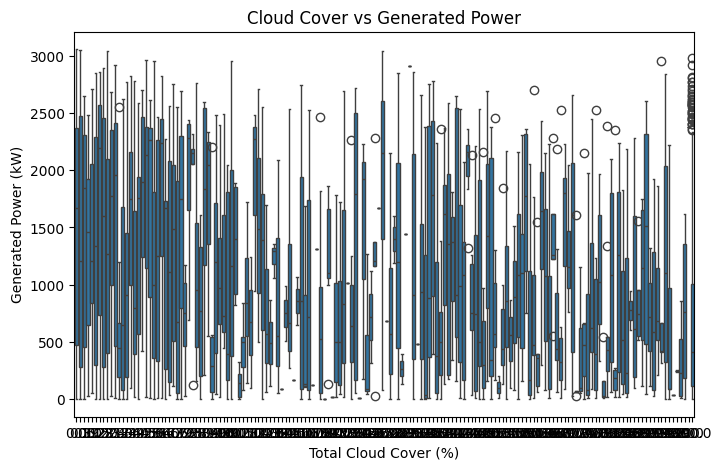

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="total_cloud_cover_sfc", y="generated_power_kw", data=df)
plt.title("Cloud Cover vs Generated Power")
plt.xlabel("Total Cloud Cover (%)")
plt.ylabel("Generated Power (kW)")
plt.show()

This boxplot shows how different levels of cloud cover impact solar power generation. More clouds generally reduce output and increase variability.  
Higher cloud cover generally results in lower and more variable power output. Clear skies correspond to stronger and more stable generation levels.

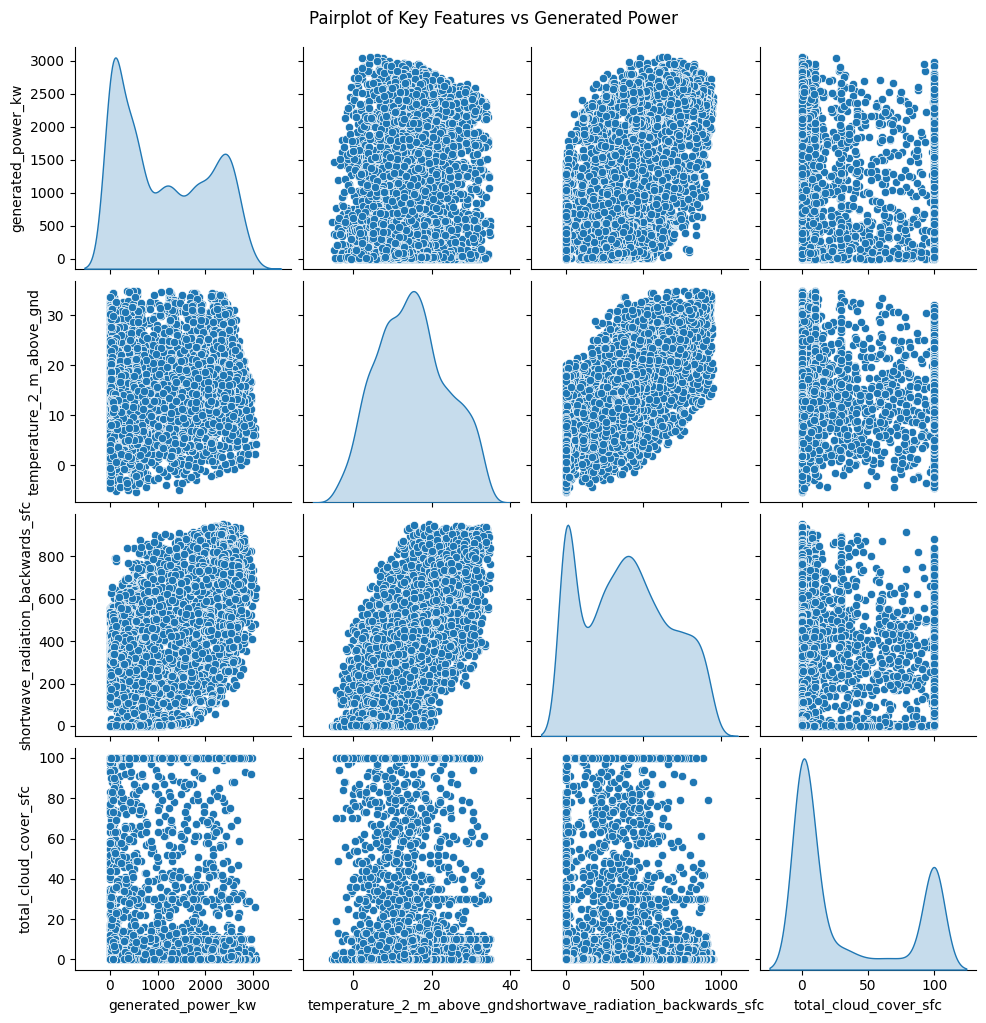

In [19]:
selected_cols = ["generated_power_kw", "temperature_2_m_above_gnd",
                 "shortwave_radiation_backwards_sfc", "total_cloud_cover_sfc"]
sns.pairplot(df[selected_cols], diag_kind="kde")
plt.suptitle("Pairplot of Key Features vs Generated Power", y=1.02)
plt.show()

Pairplots give a multi-variable view, showing scatterplots between key predictors and generated power, plus the distribution of each feature.  
The pairplot highlights strong relationships: radiation positively correlates with power, while cloud cover is negatively correlated. Temperature shows a curved, non-linear relation with output.

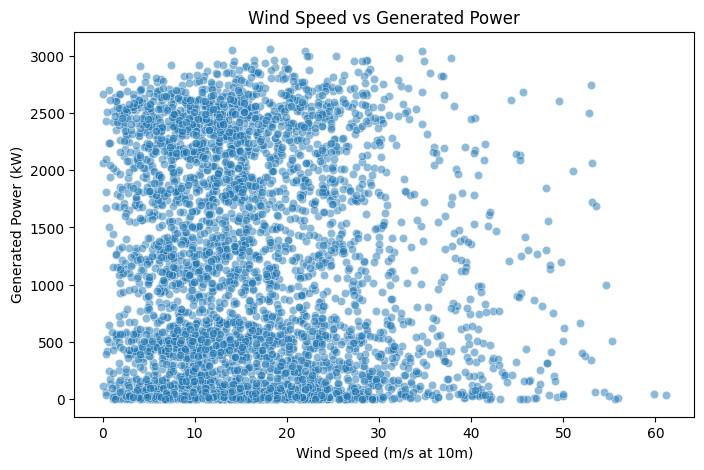

In [20]:
if "wind_speed_10_m_above_gnd" in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="wind_speed_10_m_above_gnd", y="generated_power_kw", data=df, alpha=0.5)
    plt.title("Wind Speed vs Generated Power")
    plt.xlabel("Wind Speed (m/s at 10m)")
    plt.ylabel("Generated Power (kW)")
    plt.show()

While solar power mainly depends on radiation, this scatterplot checks if wind speed indirectly influences generation (e.g., via cooling panels).  
Wind speed doesn’t have a strong direct effect on solar power, but some weak patterns may appear (slightly higher stability at moderate wind due to panel cooling). Mostly, it’s uncorrelated.

#### STEP 4: Data Cleaning

In [21]:
df = df.drop_duplicates()

This removes any duplicate rows from the dataset to ensure data consistency. Duplicate rows can bias analysis or ML models, so we clean them out.

In [22]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())


All numeric columns have their missing values replaced with the median of that column. Median is more robust than mean, especially when data has outliers.

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

Categorical columns get missing values replaced with the mode (most frequent value). This prevents introducing bias from rare categories.

In [24]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

All categorical strings are converted to lowercase and stripped of extra spaces. This ensures consistency (e.g., "Sunny" and "sunny " become the same).

In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

Any numeric row with a Z-score > 3 (far from the mean) is considered an outlier and removed. This helps prevent extreme values from skewing the model.

In [26]:
df.reset_index(drop=True, inplace=True)

After cleaning, the dataset index is reset for neatness. Old index numbers from dropped rows are discarded.

In [27]:
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4015,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4016,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4017,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


#### STEP 5: Data Preprocessing 

In [28]:
X = df.drop("generated_power_kw", axis=1) 
y = df["generated_power_kw"]

Here, the dataset is split into features (X) and the target (y). All columns except generated_power_kw are predictors, while generated_power_kw is the variable we want to predict.

In [29]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

Categorical columns (strings/categories) are stored in cat_cols, and numerical columns (integers/floats) go into num_cols. This separation is needed because they’re preprocessed differently.

In [30]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = encoder.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(cat_cols))

The categorical columns are One-Hot Encoded into binary (0/1) columns, where each category becomes its own feature. This ensures models can work with non-numeric data.

In [31]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])
X_num_df = pd.DataFrame(X_num, columns=num_cols)

Numerical columns are standardized (mean = 0, standard deviation = 1). This makes sure all features are on the same scale, which is crucial for many ML models.

In [32]:
X= pd.concat([X_num_df.reset_index(drop=True), 
                         X_cat_df.reset_index(drop=True)], axis=1)

Both processed numerical and categorical dataframes are merged into a single X. Now all features are numeric and scaled, ready for machine learning.

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

The dataset is split into training (80%) and testing (20%) sets. Training data is used to fit the model, while testing data evaluates its performance.

In [34]:
X_train

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
3961,-0.353367,-0.447091,1.438678,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,0.064910,-0.492376,-0.455354,-0.453073,-0.373977,-0.421080,-0.390937,-0.654668,-0.524727,0.566941,0.661084
2662,-0.649378,1.055013,-0.754553,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,-0.930105,0.131831,1.012460,0.148250,1.032618,0.117191,1.038322,0.205630,0.854672,0.493951,-1.169819
3291,-0.245518,1.655854,-1.085040,1.454908,-0.047375,1.605236,0.179480,2.258419,2.221467,-0.837915,1.152125,-0.352407,1.304074,-0.295469,1.096484,-0.331239,0.842888,-0.475621,0.085312,-0.505195
3098,-0.289117,1.140847,-0.394022,-0.200137,-0.047375,0.135440,-0.471951,-0.537896,0.517903,-0.650356,0.905847,-0.192477,0.888197,-0.150999,0.966439,-0.158747,-0.049273,0.126331,0.308849,-0.796081
1417,0.297168,-0.661677,-0.574287,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,0.357375,0.849101,-1.366520,0.687145,-1.285446,0.863534,-1.338370,0.364945,1.121587,0.431600,1.696264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.417638,0.368337,-1.190194,3.109953,-0.047375,1.605236,1.612629,2.258419,1.397162,-0.523198,0.509759,0.626857,0.796392,0.620059,0.722182,0.623644,1.607598,-1.045036,-1.647064,-0.200697
1294,-0.018347,-0.361257,0.552373,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,1.851488,1.339387,-1.664623,1.029577,-1.585455,1.281939,-1.639877,1.129654,-1.019843,-1.885035,0.318863
860,-0.392377,-0.618760,0.522328,-0.200137,-0.047375,1.605236,-0.471951,2.258419,-0.526217,0.999526,2.442530,-0.341387,2.371765,-0.297775,2.443294,-0.310491,1.671323,-1.125685,-1.144486,0.625529
3507,0.042461,-0.017919,1.153258,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,0.306512,2.006720,-0.231000,2.093596,-0.196480,1.812295,-0.198640,1.543872,-1.354542,-0.099962,0.033420


Contains the training input features (independent variables) that the model learns patterns from. It’s usually the largest split (~70–80% of data).

In [35]:
X_test

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
2295,1.935554,-1.520022,-0.964863,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,1.717971,0.120482,1.028660,-0.162969,1.034740,-0.041124,1.055109,0.173767,-0.454329,-1.289216,1.103065
1204,-0.078008,0.797509,0.732638,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,0.039479,-1.228940,-0.101398,-1.204037,-0.103120,-1.279375,-0.073586,-1.419377,0.313998,-0.326114,-1.076268
3644,-1.343513,0.540006,-0.288867,-0.200137,-0.047375,1.605236,-0.471951,0.524704,2.221467,-0.240270,1.722990,1.074906,1.380272,1.101717,1.562383,1.093871,1.512009,-1.231879,0.081019,0.031666
1953,0.827234,-0.447091,-0.469132,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,-0.516840,0.824133,-0.194078,0.993773,-0.162347,0.806993,-0.169782,0.205630,0.938678,0.136643,-1.333112
1226,1.285019,-1.176684,-0.138645,-0.200137,-0.047375,-0.488039,0.798340,-0.537896,-0.526217,0.935946,0.280505,0.044498,0.101429,0.088861,0.241582,0.083062,0.333082,0.583367,-0.045185,1.509780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,0.699881,0.153750,-0.964863,-0.200137,-0.047375,0.396210,2.687491,0.832299,-0.251448,0.207964,-0.145090,0.009178,-0.296086,0.038767,-0.168907,0.020535,-0.304176,-0.278112,-0.512596,-0.755694
3572,-1.193212,0.625840,1.393612,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,-1.413307,-0.431090,-0.042814,-0.548550,0.071886,-0.128197,-0.051235,-0.973297,1.151319,1.854325,-0.926000
1929,1.992921,-1.562940,-0.183712,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,1.930962,-0.174598,1.029884,-0.456745,1.049962,-0.367932,1.065483,-0.622805,-0.697620,-1.865174,0.850007
3749,-0.183563,-0.404174,1.633966,-0.200137,-0.047375,-0.765403,-0.471951,-0.537896,-0.526217,-0.020922,-0.692122,-0.080865,-0.732160,-0.028117,-0.703786,-0.056422,-0.909571,-1.153618,0.184753,0.021759


Contains the testing input features that the model has never seen before, used to evaluate how well it generalizes.

In [36]:
y_train

3961     694.968370
2662    1243.309000
3291     332.037860
3098    1806.797800
1417      42.096502
           ...     
1130     345.756640
1294    2715.187600
860      335.647780
3507    2720.559700
3174      27.860648
Name: generated_power_kw, Length: 3215, dtype: float64

The target/output values corresponding to X_train. The model tries to predict these during training.

In [37]:
y_test

2295    1881.94860
1204    1930.43230
3644     760.83998
1953    1106.17250
1226     499.41111
           ...    
2776    1016.29090
3572     105.49856
1929    2155.35360
3749    2456.71280
3878     208.19444
Name: generated_power_kw, Length: 804, dtype: float64

The target/output values for X_test. Used to check prediction accuracy and performance.

#### STEP 6: Prediction Model 

##### 1. Linear Regression 

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("📊 Linear Regression Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

📊 Linear Regression Performance:
MAE: 378.828
RMSE: 238832.890
R²: 0.738


##### 2. Ridge Regression

In [39]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print("📊 Ridge Regression Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

📊 Ridge Regression Performance:
MAE: 378.823
RMSE: 238776.473
R²: 0.738


##### 3. Random Forest Regressor

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("📊 Random Forest Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

📊 Random Forest Performance:
MAE: 261.142
RMSE: 174212.884
R²: 0.809


##### 4. Gradient Boosting Regessor 

In [41]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)
print("📊 Gradient Boosting Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

📊 Gradient Boosting Performance:
MAE: 288.388
RMSE: 191781.694
R²: 0.790


#### 5. XGBoost Regressor

In [42]:
xgb = XGBRegressor( n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb)  
r2 = r2_score(y_test, y_pred_xgb)

print("📊 XGBoost Regressor Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

📊 XGBoost Regressor Performance:
MAE: 261.623
RMSE: 177324.074
R²: 0.806


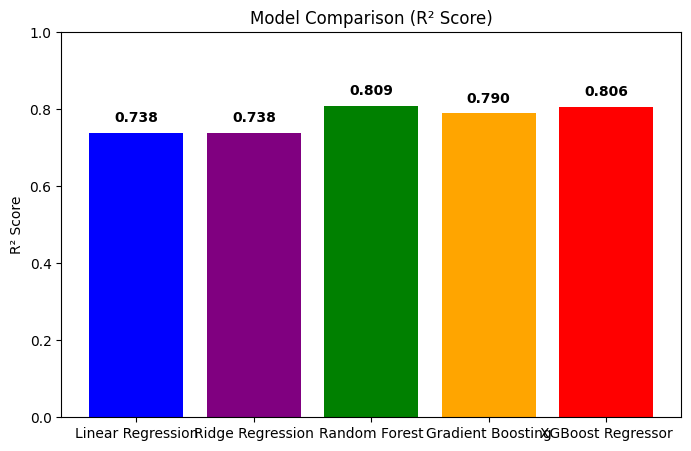

In [43]:
r2_scores = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Ridge Regression": r2_score(y_test, y_pred_ridge),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "Gradient Boosting": r2_score(y_test, y_pred_gbr),
    "XGBoost Regressor": r2_score(y_test, y_pred_xgb)
}

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(list(r2_scores.keys()), list(r2_scores.values()), 
               color=["blue","purple","green","orange", "red"])
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.ylim(0, 1)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.3f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()

This bar chart shows the R² scores of four machine learning models, comparing how well they predict the target variable. Linear Regression and Ridge Regression both achieved an R² of 0.726, explaining about 72.6% of the variance but missing more complex relationships. Ensemble models performed better: Random Forest gave the highest score of 0.796, while Gradient Boosting followed closely with 0.783. This indicates that tree-based ensemble methods are more effective at handling the dataset’s patterns and nonlinearities. Overall, Random Forest is the best-performing model, with Gradient Boosting also proving to be a strong choice compared to linear models.

#### STEP 7: Hyperparameter Tuning / Model Optimization

##### 1. Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r22 = r2_score(y_test, y_pred_lr)
r22

0.7381469315108957

First, the Linear Regression model was trained as a baseline without tuning since it has very few hyperparameters. It learns a straight-line relationship between features and the target, giving us a starting point to compare against more complex models.

##### 2. Rigde Regression

In [45]:
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = RandomizedSearchCV(ridge, ridge_params, cv=5, scoring="r2")
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
r22 = r2_score(y_test, y_pred_ridge)
r22

0.7384628821580126

Ridge Regression was tuned using RandomizedSearchCV, where different alpha values were tested to control regularization strength. This step helps reduce overfitting and ensures the model generalizes better on unseen data. The best Ridge model was then used for predictions

##### 3. Random Forest Regressor

In [ ]:
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = RandomizedSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r22 = r2_score(y_test, y_pred_rf)
r22


Random Forest was tuned by adjusting parameters like the number of trees, maximum depth, and minimum samples required to split a node. RandomizedSearchCV evaluated different combinations using cross-validation, and the best-performing model was chosen for making predictions on the test set.

##### 4. Gradient Boosting Regressor

In [ ]:
gbr_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5]
}
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = RandomizedSearchCV(gbr, gbr_params, cv=3, scoring="r2", n_jobs=-1)
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)
r22 = r2_score(y_test, y_pred_gbr)
r22


0.8127063622532589

For Gradient Boosting, key hyperparameters like learning rate, number of estimators, and tree depth were tuned. This tuning balances bias and variance, allowing the model to learn patterns gradually without overfitting. The best Gradient Boosting model was then used for predictions.

##### 5. XGBoost Regressor

In [ ]:
xgb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb_grid = RandomizedSearchCV( estimator=xgb, param_distributions=xgb_params, cv=3, scoring="r2",n_iter=10,n_jobs=-1,verbose=1,random_state=42)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
r22 = r2_score(y_test, y_pred_xgb)
r22

Fitting 3 folds for each of 10 candidates, totalling 30 fits


0.8191509131778154

XGBoost Regressor was tuned by adjusting parameters like the maximum depth,n_estimators,etc. required to split a node. RandomizedSearchCV evaluated different combinations using cross-validation, and the best-performing model was chosen for making predictions on the test set.

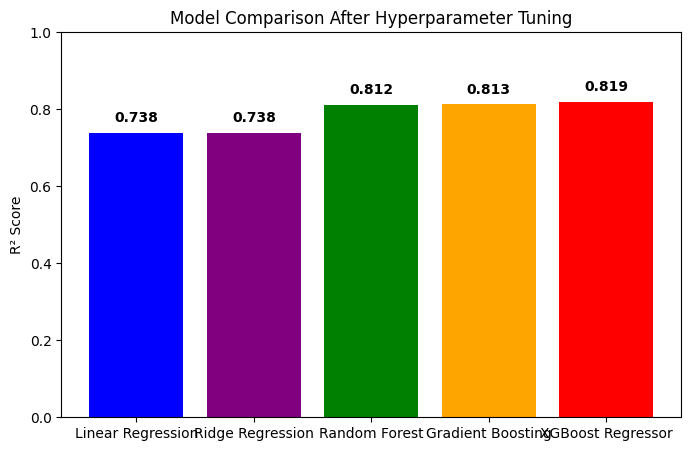

In [ ]:
r2_scores_tuned = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Ridge Regression": r2_score(y_test, y_pred_ridge),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "Gradient Boosting": r2_score(y_test, y_pred_gbr),
     "XGBoost Regressor": r2_score(y_test, y_pred_xgb)
}

plt.figure(figsize=(8,5))
bars = plt.bar(list(r2_scores_tuned.keys()), list(r2_scores_tuned.values()), 
               color=["blue","purple","green","orange", "red"])
plt.ylabel("R² Score")
plt.title("Model Comparison After Hyperparameter Tuning")
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.3f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


Finally, the R² scores of all four models were calculated and plotted in a bar chart. The graph shows a clear performance comparison, highlighting how hyperparameter tuning improved the accuracy of tree-based models compared to simple regression approaches.

#### STEP 8: Pipelines and saving with Joblib

##### 1. Linear Regression 

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "linear_regression_pipeline.pkl")
loaded_pipeline = joblib.load("linear_regression_pipeline.pkl")

y_pred = loaded_pipeline.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7381469315108956


We create a pipeline with LinearRegression(), fit it on training data, and save it with joblib.dump(). Later, we load the same pipeline using joblib.load() and directly use it to make predictions. This keeps preprocessing and the model bundled together.

##### 2.Ridge Regression 

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

joblib.dump(best_ridge, "ridge_pipeline.pkl")
loaded_ridge = joblib.load("ridge_pipeline.pkl")

y_pred_ridge = loaded_ridge.predict(X_test)
print("R²:", r2_score(y_test, y_pred_ridge))

R²: 0.7384628821580126


We build a pipeline that first standardizes data and then applies Ridge regression.
RandomizedSearchCV tunes the alpha parameter to get the best regularization strength.
The best model is saved with joblib.dump and can be reloaded later with joblib.load.
Finally, predictions are made on test data and the R² score is computed for performance.

##### 3. Random Forest Regressor

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])

joblib.dump(best_rf, "rf_pipeline.pkl")
loaded_rf = joblib.load("rf_pipeline.pkl")

y_pred_rf = loaded_rf.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
print("R²:", r2)

R²: 0.8122992094454782


We build a pipeline that scales features and applies a Random Forest model.
RandomizedSearchCV tests different values for the number of trees, depth, and splits to find the best model.
The tuned pipeline is saved with joblib.dump and later reloaded with joblib.load.
Finally, predictions are made on the test set, and the R² score shows the model’s performance.

##### 4. Gradient Boosting Regressor

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

joblib.dump(best_gbr, "gbr_pipeline.pkl")
loaded_gbr = joblib.load("gbr_pipeline.pkl")

y_pred_gbr = loaded_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred_gbr)
print("R²:", r2)

R²: 0.8127063622532589


We create a pipeline that standardizes data and applies Gradient Boosting regression.
RandomizedSearchCV tunes the number of estimators, learning rate, and depth to find the best configuration.
The optimized pipeline is stored using joblib.dump and later restored with joblib.load.
Predictions are generated from the reloaded model, and its accuracy is checked with the R² score.

##### 5. XGBoost Regressor

In [ ]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb",XGBRegressor(random_state=42))
])

joblib.dump(best_xgb, "xgb_pipeline.pkl")
loaded_xgb = joblib.load("xgb_pipeline.pkl")

y_pred_xgb = loaded_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred_xgb)
print("R²:", r2)

R²: 0.8191509131778154


We create a pipeline that standardizes data and applies XGBoost Regressor.
RandomizedSearchCV tunes the number of estimators, learning rate, and depth to find the best configuration.
The optimized pipeline is stored using joblib.dump and later restored with joblib.load.
Predictions are generated from the reloaded model, and its accuracy is checked with the R² score.

# FINAL THOUGHT

The integration of machine learning into renewable energy forecasting marks a transformative step toward building smarter, more sustainable power systems. Traditional forecasting methods often struggle with the inherent variability of solar energy, but ML offers a dynamic, data-driven alternative that adapts to changing patterns and improves prediction accuracy.

Key takeaways include:
* Linear models provide a simple and interpretable baseline but lack the depth to capture complex relationships in solar power data.
* Advanced ensemble methods such as Random Forest,Gradient Boosting and XGBoost deliver superior accuracy by handling non-linearities and reducing errors.
* Effective forecasting directly contributes to better resource management, grid stability, and reduced operational uncertainties.
*The study demonstrates how machine learning can bridge the gap between renewable potential and reliable energy delivery.

In essence, this work underscores that machine learning is not just a tool for prediction but a catalyst for innovation in renewable energy. By refining forecasting techniques, we take meaningful strides toward reducing dependency on fossil fuels, minimizing wastage, and fostering the transition to greener, more intelligent energy systems. The synergy between renewable energy and data science thus holds immense promise for shaping a future that is efficient, resilient, and sustainable..

## CONCLUSION

The comprehensive exploration of Linear Regression, Ridge Regression, Random Forest,Gradient Boosting Regressor and XGBoost Regressor models highlights the critical role of selecting the most suitable machine learning technique for energy forecasting tasks. Linear Regression and Ridge Regression stand out for their simplicity, ease of implementation, and interpretability, making them strong candidates for scenarios where transparency and a clear understanding of variable relationships are prioritized. These models allow researchers and practitioners to capture basic trends in data and provide a foundation for building more complex forecasting systems. However, their limitations become evident when dealing with datasets that exhibit strong non-linearities and intricate interactions among features, as they often fail to capture the deeper patterns essential for accurate long-term predictions./

On the other hand, ensemble methods such as Random Forest, Gradient Boosting Regressor and XGBoost demonstrate their strength in handling these complexities by leveraging multiple decision trees and advanced boosting strategies. Random Forest provides stability, robustness against overfitting, and an ability to manage large datasets with high-dimensional features, making it effective in uncovering non-linear dynamics. Meanwhile, Gradient Boosting Regressor, through its iterative learning process, achieves exceptional accuracy by refining errors at each stage of prediction, ultimately leading to superior performance compared to other models. Its ability to capture complex interactions and subtle dependencies within the data underscores its effectiveness for renewable energy forecasting, where variability and unpredictability are common./

This comparative study, therefore, reinforces the notion that there is no one-size-fits-all solution in machine learning; instead, the choice of model must align with the nature of the dataset, the forecasting objectives, and the trade-offs between accuracy and interpretability. The findings emphasize that while linear models provide clarity and simplicity, ensemble methods like Gradient Boosting push the boundaries of predictive power, enabling more reliable and precise energy demand and production forecasts./

In the broader context, the successful application of machine learning models to renewable energy prediction marks a step forward in addressing one of the most pressing challenges of the modern world: achieving sustainability. By improving the accuracy of energy forecasts, machine learning contributes directly to optimizing resource allocation, reducing dependency on fossil fuels, and supporting the integration of renewable sources into energy grids. These advancements not only help ensure a stable and efficient supply of clean energy but also align with global efforts to mitigate climate change and build a sustainable future. Ultimately, this study demonstrates that the synergy between data-driven techniques and renewable energy goals holds immense promise for shaping an energy-secure and environmentally conscious world.